##Download de dataset

In [ ]:
!kaggle datasets download -d caiojs/mnist-as-images-train-and-test

Dataset URL: https://www.kaggle.com/datasets/caiojs/mnist-as-images-train-and-test
License(s): DbCL-1.0
mnist-as-images-train-and-test.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/mnist-as-images-train-and-test.zip

Archive:  /content/mnist-as-images-train-and-test.zip
replace test_images/0/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

##Importando bibliotecas

In [ ]:
!pip install keras

In [ ]:
import pandas as pd #Base de manipulação de dados em formato de
import os #Interagir com sistema operacional (manipular caminhos)
import numpy as np #Manipular valores e operações numéricas (arrays, listas)
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

##bibliotecas para trabalhar com imagens
import cv2 #open cv(visão domputacional) processa imagens e vídeos
from PIL import Image #PIllow (image) manipular arquivos de imagem

#bibliotecas para trabalhar com deeplearning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential #type: ignore
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout #type: ignore
from keras.utils import to_categorical #type: ignore

## Exploração dos dados

In [ ]:
imgPIL = Image.open('/content/test_images/0/10.jpg')
imgPIL

In [ ]:
imgCV = cv2.imread('/content/test_images/3/1020.jpg')
imgCV

array([[[1, 1, 1],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[3, 3, 3],
        [0, 0, 0],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

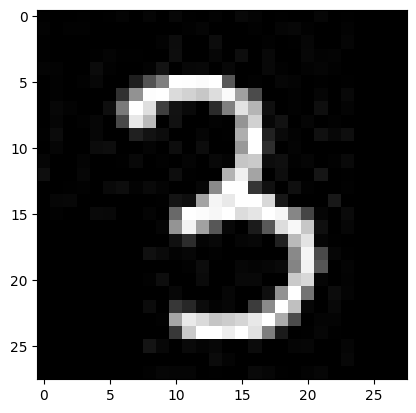

In [ ]:
plt.imshow(imgCV)

In [ ]:
imgCV.shape

(28, 28, 3)

In [ ]:
imgCV = cv2.cvtColor(imgCV, cv2.COLOR_BGR2GRAY)
imgCV.shape

(28, 28)

In [ ]:
imgPIL = np.array(imgPIL)
imgPIL

array([[  0,   0,   0,   0,   0,   0,   0,   0,  12,   0,   9,   0,   1,
          1,   1,   0,   0,   5,   4,   0,   0,   0,   2,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  10,   0,   5,   0,
          8,   4,   3,   3,   0,  12,   6,   0,  10,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  21,   0,   0,   3,
          0,   6,   0,   2,   1,   0,   0,   0,   7,   0,  18,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21,   0,
          0,   8,   9,  13,   0,  11,   3,  16,   0,  21,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   9,   0,   5,  58,   0,
         55, 107, 183, 109, 142,  49,   0,   0,   0,   6,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  28, 174, 244, 236,
        241, 255, 255, 245, 255, 231, 237,  95,  15,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   8, 120, 255, 255, 252,
        209, 193, 161, 182, 176, 255, 255, 234,  32,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  44, 250, 254, 222,  51,
         46,   0,  12,   0,   5, 123, 251, 248, 186,  24,   0,   0,   0,
          0,   0],
       [  0,   5,   0,   1,   0,   0,   5,   1,  49, 255, 255, 101,  11,
          0,   1,   3,   3,  11,   0, 125, 255, 247,  72,   0,   0,   0,
          0,   0],
       [  0,   8,   0,   0,   6,   4,   5,   0,  80, 237, 143,   7,   0,
          8,   6,   1,   0,   0,   8,  18, 230, 251, 165,   0,   0,   0,
          0,   0],
       [  0,   6,   0,   0,   4,   8,   0,   1, 173, 255, 107,   0,   4,
         10,   0,   0,   2,   2,   1,   0, 147, 255, 213,   0,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   0,   0,   0,  46, 227, 238,  69,   0,   3,
          0,   0,   5,   3,  12,   0,   7,  80, 255, 206,   1,   0,   0,
          0,   0],
       [  2,   0,   0,   5,   0,   0,   0, 130, 255, 151,   5,   0,   0,
          0,   4,   5,   1,   0,   1,  10,  79, 244, 216,   2,   0,   0,
          0,   0],
       [  1,   0,   2,   8,   0,   0,   9, 200, 244,  70,   0,   9,   1,
          0,   8,   0,   2,   0,   0,   1,  78, 255, 223,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   1,   0,   2,   8, 223, 185,   4,   0,   8,   3,
          0,   8,   0,   1,  11,   0,   4,  72, 255, 213,   0,   0,   0,
          0,   0],
       [  4,   2,   5,   0,   0,   8,   5, 220, 198,   5,   4,   0,   1,
          1,   6,   0,   0,   4,   3,   0,  89, 251, 212,   3,   0,   0,
          0,   0],
       [  0,   8,   0,   5,   0,   4,  88, 255, 199,   0,   0,   0,   1,
          0,   5,   2,   5,   1,  12,   0, 170, 253, 214,   0,   0,   0,
          0,   0],
       [  0,   2,   0,   1,   0,   2, 108, 255, 200,   2,   5,   0,   2,
          3,   7,   0,   0,  17,   0,  51, 239, 253,  68,   0,   0,   0,
          0,   0],
       [  3,   0,   0,   7,   0,   2, 106, 246, 199,   0,   2,   0,   0,
          7,   0,   0,  14,   0,  44, 188, 240, 190,  14,  10,   0,   0,
          0,   0],
       [  2,   0,   1,  11,   0,   3,  57, 235, 205,   3,   0,   2,   0,
          1,   0,   9,   0,   2, 179, 236, 238,  59,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,   7,   3, 227, 192,  21,   0,   7,   4,
          0,   6,  49, 162, 212, 248, 255,  60,   7,   0,   8,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  15,   0, 193, 255, 200, 176, 179, 179,
        173, 191, 227, 249, 248, 230, 154,   0,   0,  31,   0,   0,   0,
          0,   0],
       [  6,   0,   3,   0,   2,   8,   0,  98, 187, 255, 255, 255, 255,
        255, 255, 246, 255, 230, 122,  28,   0,   5,   0,   3,   0,   0,
          0,   0],
       [  4,   0,   2,   0,   7,   0,   0,   0,  32, 212, 255, 243, 251,
        255, 238, 164, 106,   4,   0,   0,   0,  17,   5,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

## Preparação de dados

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
def load_images_and_labels(folder):
  data = {'image': [], 'label': []}

  for label in class_names:
    path = os.path.join(folder, label)
    for file in tqdm(os.listdir(path), desc=f'Loading {label}'):
      img_path = os.path.join(path, file)
      img = cv2.imread(img_path)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      if img is not None:
        data['image'].append(img)
        data['label'].append(label)
  return pd.DataFrame(data)

In [ ]:
df_train = load_images_and_labels('/content/train_images')

Loading 9: 100%|██████████| 5949/5949 [00:03<00:00, 1671.50it/s]


In [ ]:
X = df_train['image']
y = df_train['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df_train.head()

,image,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0,...",0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 8, 0, 7, 5, 0,...",0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 1, 0, 0, 0, 15...",0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 1, 9, 8,...",0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0,...",0


In [ ]:
X_train = np.array([np.array(image) for image in X_train])
X_val = np.array([np.array(image) for image in X_val])

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [ ]:
print(X_train.shape, y_train.shape)

(48000, 28, 28) (48000, 10)


In [ ]:
print(X_val.shape, y_val.shape)

(12000, 28, 28) (12000, 10)


## Modelagem

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 317,066 (1.21 MB)

 Trainable params: 317,066 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val))

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 45ms/step - accuracy: 0.8174 - loss: 2.3450 - val_accuracy: 0.9764 - val_loss: 0.0790
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 42ms/step - accuracy: 0.9660 - loss: 0.1183 - val_accuracy: 0.9826 - val_loss: 0.0580
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.9723 - loss: 0.0934 - val_accuracy: 0.9829 - val_loss: 0.0649


In [ ]:
def plotLearningCurve(history, epochs):
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='best')
  plt.show()

  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='best')
  plt.show()

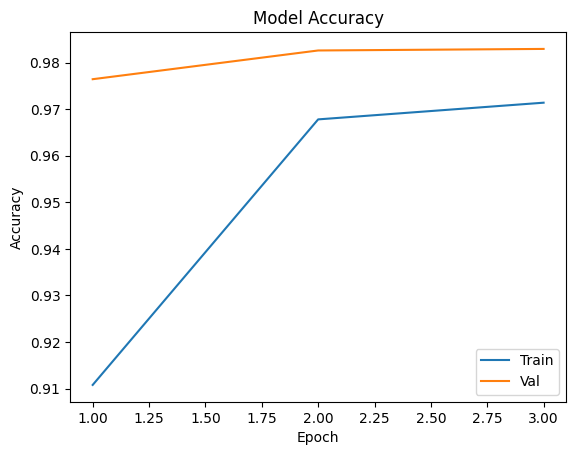

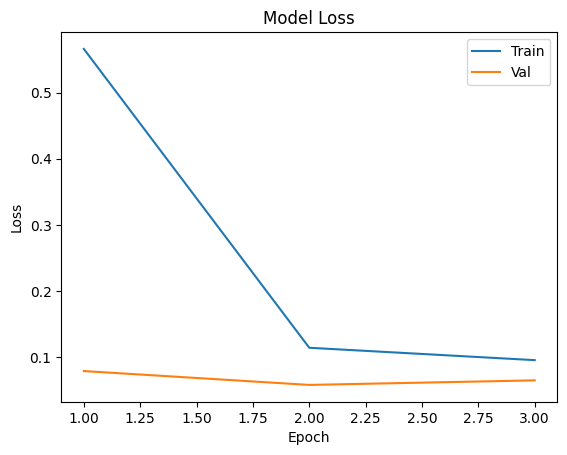

In [ ]:
plotLearningCurve(history, 3)

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

y_val_classes = np.argmax(y_val, axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [ ]:
matriz = confusion_matrix(y_val_classes, y_pred_classes)
matriz

array([[1173,    0,    0,    0,    0,    0,    5,    0,    0,    3],
       [   1, 1333,    4,    1,    3,    0,    2,    4,    1,    1],
       [   0,    2, 1151,    2,    1,    0,    0,    4,    2,    0],
       [   0,    0,    5, 1185,    0,    5,    0,    2,    4,    2],
       [   2,    1,    0,    0, 1111,    0,    2,    2,    1,    5],
       [   4,    1,    0,    5,    1, 1091,    7,    0,    5,    2],
       [   3,    1,    1,    0,    3,    4, 1206,    0,    2,    1],
       [   1,    3,   13,    4,    5,    0,    0, 1210,    3,   10],
       [   9,    2,    8,    5,    2,    5,    6,    2, 1168,    3],
       [   2,    0,    1,    1,    2,    1,    1,    6,    3, 1167]])

<Axes: >

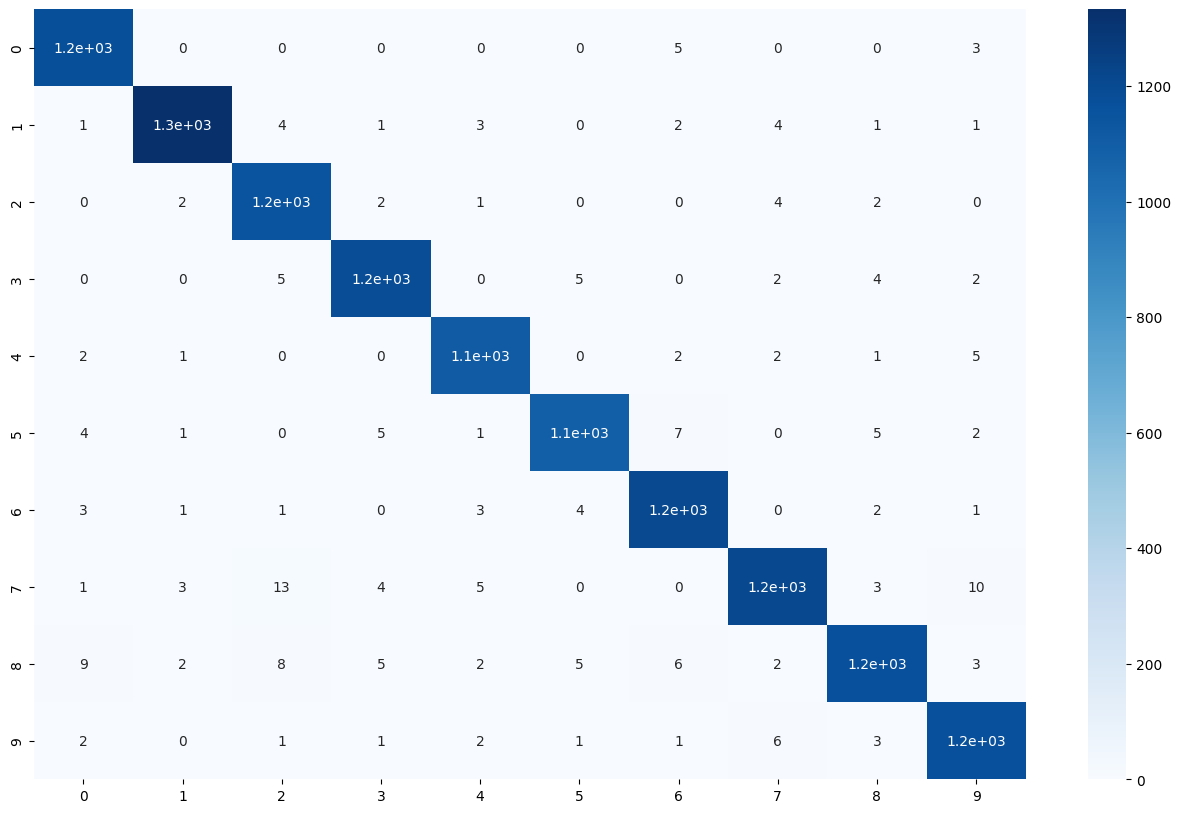

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(matriz, annot=True, cmap='Blues')

In [ ]:
model.save('model.keras')